# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 02 Machine Learning</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio dbfread

Libraries to be used:

In [8]:
import rasterio
import numpy as np
#from scikeo.mla import MLA
import matplotlib.pyplot as plt
from dbfread import DBF
import matplotlib as mpl
import pandas as pd

## 2.0 Optical image

Landsat-8 OLI (Operational Land Imager) will be used to obtain in order to classify using Random Forest (RF). This image, which is in surface reflectance with bands:
- Blue -> B2
- Green -> B3 
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

The image and signatures to be used can be downloaded [here](https://drive.google.com/drive/folders/193RhNpACu9THcOZu8OzMh-btnFCOgHrU?usp=sharing):

## 3.0 Supervised Classification using Random Forest

Image and endmembers

In [9]:
path_raster = r"F:\RepositoriosGitHub\scikit-eo-tutorials\data\02_ml\LC08_232066_20190727_SR.tif"
img = rasterio.open(path_raster)

path_endm = r"F:\RepositoriosGitHub\scikit-eo-tutorials\data\02_ml\endmembers.dbf"
endm = DBF(path_endm)

In [10]:
# endmembers
df = pd.DataFrame(iter(endm))
df.head()

,class,b1_LC08_23,b2_LC08_23,b3_LC08_23,b4_LC08_23,b5_LC08_23,b6_LC08_23
0,1.0,646,1137,1446,569,53,33
1,1.0,658,1141,1449,585,68,44
2,1.0,663,1149,1455,573,67,43
3,1.0,657,1147,1453,556,48,29
4,1.0,662,1147,1451,557,52,31


Instance of ```mla()```:

In [11]:
inst = MLA(image = img, endmembers = endm)

Applying Support Vector Machine with 70% of data to train

In [12]:
#import warnings 
#warnings.filterwarnings("ignore")

rf_class = inst.SVM(training_split = 0.7)

## 4.0 Results

Dictionary of results

In [13]:
rf_class.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

Overall accuracy

In [14]:
rf_class.get('Overall_Accuracy')

0.90625

Kappa index

In [15]:
rf_class.get('Kappa_Index')

0.8736842105263158

Confusion matrix or error matrix

In [16]:
rf_class.get('Confusion_Matrix')

,0,1,2,3,Total,Users_Accuracy,Commission
0,20.0,0.000000,2.0,0.000,22.0,90.909091,9.090909
1,0.0,22.000000,0.0,5.000,27.0,81.481481,18.518519
2,0.0,0.000000,18.0,0.000,18.0,100.000000,0.000000
3,0.0,2.000000,0.0,27.000,29.0,93.103448,6.896552
Total,20.0,24.000000,20.0,32.000,NaN,NaN,NaN
Producer_Accuracy,100.0,91.666667,90.0,84.375,NaN,NaN,NaN
Omission,0.0,8.333333,10.0,15.625,NaN,NaN,NaN


Preparing the image before plotting

In [17]:
# convert to array
arr_img = img.read()
# stacking the image
rgb = np.stack([arr_img[4,:,:], arr_img[3,:,:], arr_img[2,:,:]], axis = -1)

# Normalizing bands
def stretch_std(arr, std_val):
    """ Returns the data with a standard deviation contrast applied """
    mean = np.mean(arr)
    std = np.std(arr)*std_val
    min_val = np.max([mean - std, np.min(arr)])
    max_val = np.min([mean + std, np.max(arr)])
    clipped_arr = np.clip(arr, min_val, max_val)
    img = (clipped_arr - min_val)/(max_val - min_val)
    return img

rgb_norm = stretch_std(rgb, 2.5)

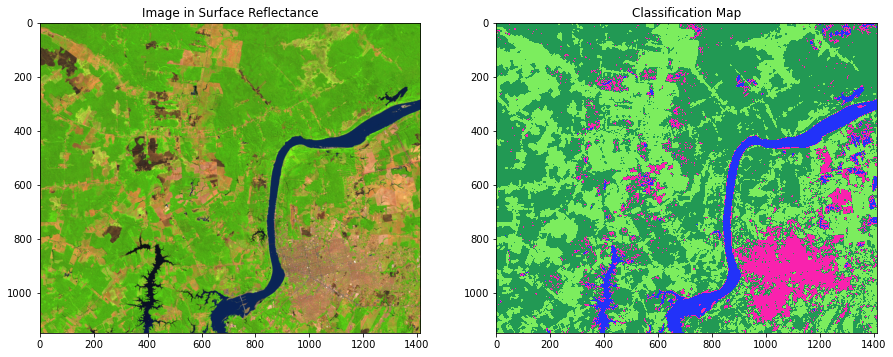

In [18]:
# Let's define the color palette
palette = mpl.colors.ListedColormap(["#2232F9","#F922AE","#229954","#7CED5E"])

# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))
axes[0].imshow(rgb_norm)
axes[0].set_title("Image in Surface Reflectance")
axes[0].grid(False)

axes[1].imshow(rf_class.get('Classification_Map'), cmap = palette)
axes[1].set_title("Classification Map")
axes[1].grid(False)